<a href="https://colab.research.google.com/github/khalidpark/whitepaper-DeepLearning/blob/main/deep_learning_whitepapaer_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Keras를 이용한 RNN/LSTM 감정분류(Sentiment Classification)

In [2]:
'''
# IMDB 감성 분류 작업에 대한 LSTM 모델을 학습합니다.
데이터 집합이 사실 너무 작아서 LSTM이 강점을 발휘할 수 없습니다.
TF-IDF + LogReg와 같은 간단하고 빠른 방법이 LSTM에 비해 훨씬 빠릅니다.
**Notes**
- RNN은 까다롭습니다. 배치 크기 선택이 중요하고, 손실 및 최적화 도구 선택이 중요합니다. 일부 구성은 수렴되지 않을 것입니다.
- 교육 중 LSTM 손실 감소 패턴은 CNN/MLP/etc에서 보는 것는 상당히 다를 수 있습니다.
'''
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb

# 이 단어 랭크 수 뒤에 텍스트는 사용하지 않도록 잘라냅니다(단어 등장 순위 : max_feature)
# 참조링크 : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data
max_features = 20000
# 최대 단어 길이
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print('Pad Sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)

Pad Sequences (samples x time)
x_train shape:  (25000, 80)
x_test shape:  (25000, 80)


In [4]:
x_train[0]

array([   15,   256,     4,     2,     7,  3766,     5,   723,    36,
          71,    43,   530,   476,    26,   400,   317,    46,     7,
           4, 12118,  1029,    13,   104,    88,     4,   381,    15,
         297,    98,    32,  2071,    56,    26,   141,     6,   194,
        7486,    18,     4,   226,    22,    21,   134,   476,    26,
         480,     5,   144,    30,  5535,    18,    51,    36,    28,
         224,    92,    25,   104,     4,   226,    65,    16,    38,
        1334,    88,    12,    16,   283,     5,    16,  4472,   113,
         103,    32,    15,    16,  5345,    19,   178,    32],
      dtype=int32)

In [5]:
import tensorflow as tf

# model = Sequential()
# model.add(Embedding(max_features, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(max_features, 128),
  tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [6]:
unicorns = model.fit(x_train, y_train,
          batch_size=batch_size, 
          epochs=3, 
          validation_data=(x_test,y_test))

Epoch 1/3
782/782 [==============================] - 221s 279ms/step - loss: 0.4342 - accuracy: 0.7970 - val_loss: 0.3850 - val_accuracy: 0.8333
Epoch 2/3
782/782 [==============================] - 217s 278ms/step - loss: 0.2571 - accuracy: 0.8974 - val_loss: 0.3721 - val_accuracy: 0.8385
Epoch 3/3
782/782 [==============================] - 218s 278ms/step - loss: 0.1656 - accuracy: 0.9381 - val_loss: 0.4802 - val_accuracy: 0.8246


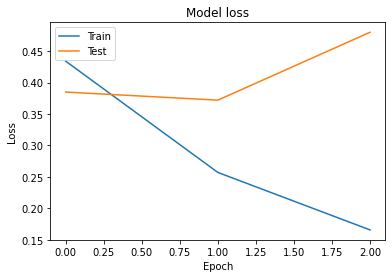

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(unicorns.history['loss'])
plt.plot(unicorns.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show();

### 2. LSTM 텍스트 생성기 with Keras

LSTMs로 무엇을 할 수 있을까요? **시퀀스**를 분석하고 있기 때문에, 우리는 분류 이상의 것을 할 수 있습니다. 

다음 텍스트를 **생성**할 수 있습니다. 
**니체(Friedrich Nietzsche)의 글** 을 이용해서 실습을 해봅시다

Keras [LSTM text Generation](https://keras.io/zh/examples/lstm_text_generation/).

In [8]:
# 라이브러리, 데이터 불러오기
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

path = get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

614400/600901 [==============================] - 0s 0us/step
corpus length: 600893
total chars: 57


In [9]:
# max length를 이용하여 문자열의 크기 정렬
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

nb sequences: 200285
Vectorization...


In [10]:
# LSTM 모델 제작
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.2, 0.5, 1.0, 1.2]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            generated += next_char
            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [13]:
model.fit(x, y,
          batch_size=128,
          epochs=2,
          callbacks=[print_callback])

Epoch 1/2
1565/1565 [==============================] - 165s 106ms/step - loss: 1.5822

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "mits the casting of doubts upon the inex"
mits the casting of doubts upon the inexperion of the such an and artists and in the self and interpreted and in the strange of the sense of the man is a man is a first the strength, the such assime of the self and assuming and and the world, and the serration of the freels and interpretion of the something the serrors of the strange of the strange of the prosertion of the strange of the sense of the conscience of the proserble in the s
----- diversity: 0.5
----- Generating with seed: "mits the casting of doubts upon the inex"
mits the casting of doubts upon the inexperience of the sense of the conscious
and still such and woman and sees the fact of the proper--and onebless as there is as is like that is for the to something the respect of the certain of the self in the
wor